In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [70]:
raw_data = pd.read_excel("C:/Users/rohan/Downloads/Cleaned_file1.xlsx")
raw_data

,DISBURSED_AMOUNT,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,EMPLOYMENT_TYPE,EMPLOYEE_CODE_ID,PAN_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE_DESCRIPTION,...,SEC_CURRENT_BALANCE,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,AGE,Region
0,50578,89.55,67,22807,45,Salaried,1998,0,0,No Bureau History Available,...,0,0,0,0,0,0,0,0,34,Punjab
1,47145,73.23,67,22807,45,Self employed,1998,0,0,I-Medium Risk,...,0,1991,0,0,1,23,0,1,33,Punjab
2,53278,89.63,67,22807,45,Self employed,1998,0,0,No Bureau History Available,...,0,0,0,0,0,0,0,0,32,Punjab
3,57513,88.48,67,22807,45,Self employed,1998,0,0,L-Very High Risk,...,0,31,0,0,0,15,1,1,24,Punjab
4,52378,88.39,67,22807,45,Self employed,1998,0,0,No Bureau History Available,...,0,0,0,0,0,0,1,1,40,Punjab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225482,63213,60.72,34,20700,48,Salaried,3705,0,0,D-Very Low Risk,...,0,4084,0,0,0,39,0,0,30,Unknown
225483,73651,74.95,34,23775,51,Self employed,3705,0,0,A-Very Low Risk,...,0,1565,0,0,0,6,0,0,29,Army Postal Service (APS)
225484,33484,48.45,77,22186,86,Salaried,3479,0,0,No Bureau History Available,...,0,0,0,0,0,0,0,0,42,Uttar Pradesh and Uttaranchal
225485,34259,49.10,77,22186,86,Salaried,3479,0,0,No Bureau History Available,...,0,0,0,0,0,0,0,0,24,Uttar Pradesh and Uttaranchal


In [60]:
raw_data.columns.values

array(['DISBURSED_AMOUNT', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'EMPLOYMENT_TYPE', 'EMPLOYEE_CODE_ID',
       'PAN_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION',
       'PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'AGE', 'Region'], dtype=object)

In [78]:
loan_df_temp = pd.get_dummies(raw_data, drop_first = True, dtype = int)

In [80]:
loan_df_temp.columns.values

array(['DISBURSED_AMOUNT', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'EMPLOYEE_CODE_ID', 'PAN_FLAG', 'PASSPORT_FLAG',
       'PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'AGE',
       'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_

In [82]:
variables = loan_df_temp[['DISBURSED_AMOUNT', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'EMPLOYEE_CODE_ID', 'PAN_FLAG', 'PASSPORT_FLAG',
       'PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'AGE',
       'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available',
       'Region_Army Postal Service (APS)', 'Region_Assam',
       'Region_Bihar and Jharkhand', 'Region_Delhi', 'Region_Gujarat',
       'Region_Haryana', 'Region_Himachal Pradesh',
       'Region_Jammu & Kashmir', 'Region_Karnataka', 'Region_Kerala',
       'Region_Madhya Pradesh and Chattisgarh', 'Region_Maharashtra',
       'Region_North Eastern', 'Region_Orissa', 'Region_Punjab',
       'Region_Rajasthan', 'Region_Tamil Nadu', 'Region_Unknown',
       'Region_Uttar Pradesh and Uttaranchal', 'Region_West Bengal']]
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
print(vif)

                                             Features        VIF
0                                    DISBURSED_AMOUNT  24.738718
1                                                 LTV  48.057740
2                                           BRANCH_ID   2.687759
3                                         SUPPLIER_ID  29.708460
4                                     MANUFACTURER_ID  11.094910
5                                    EMPLOYEE_CODE_ID   3.716351
6                                            PAN_FLAG   1.150517
7                                       PASSPORT_FLAG   1.004640
8                                 PRI_CURRENT_BALANCE   1.239523
9                                 SEC_CURRENT_BALANCE   1.017119
10                                 PRIMARY_INSTAL_AMT   1.057617
11                                     SEC_INSTAL_AMT   1.011599
12                       NEW_ACCTS_IN_LAST_SIX_MONTHS   1.672590
13                DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS   1.418038
14                       

In [86]:
loan_df_temp1 = loan_df_temp.drop(['MANUFACTURER_ID','SUPPLIER_ID',], axis = 1)

In [88]:
variables = loan_df_temp1[['DISBURSED_AMOUNT', 'LTV', 'BRANCH_ID', 'EMPLOYEE_CODE_ID', 'PAN_FLAG', 'PASSPORT_FLAG',
       'PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT', 'AGE',
       'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available',
       'Region_Army Postal Service (APS)', 'Region_Assam',
       'Region_Bihar and Jharkhand', 'Region_Delhi', 'Region_Gujarat',
       'Region_Haryana', 'Region_Himachal Pradesh',
       'Region_Jammu & Kashmir', 'Region_Karnataka', 'Region_Kerala',
       'Region_Madhya Pradesh and Chattisgarh', 'Region_Maharashtra',
       'Region_North Eastern', 'Region_Orissa', 'Region_Punjab',
       'Region_Rajasthan', 'Region_Tamil Nadu', 'Region_Unknown',
       'Region_Uttar Pradesh and Uttaranchal', 'Region_West Bengal']]
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
print(vif)

                                             Features        VIF
0                                    DISBURSED_AMOUNT  23.360430
1                                                 LTV  45.438401
2                                           BRANCH_ID   2.603091
3                                    EMPLOYEE_CODE_ID   3.643377
4                                            PAN_FLAG   1.149366
5                                       PASSPORT_FLAG   1.004539
6                                 PRI_CURRENT_BALANCE   1.239236
7                                 SEC_CURRENT_BALANCE   1.017088
8                                  PRIMARY_INSTAL_AMT   1.057604
9                                      SEC_INSTAL_AMT   1.011594
10                       NEW_ACCTS_IN_LAST_SIX_MONTHS   1.672099
11                DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS   1.417994
12                              CREDIT_HISTORY_LENGTH   2.404276
13                                    NO_OF_INQUIRIES   1.200767
14                       

In [90]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming `data` is your DataFrame after loading the complete dataset
pca_columns = ['AGE', 'DISBURSED_AMOUNT', 'LTV']

# Extract the subset of data for these columns and standardize
pca_data = loan_df_temp1[pca_columns]
scaler = StandardScaler()
pca_data_scaled = scaler.fit_transform(pca_data)

# Applying PCA to reduce to a single component
pca = PCA(n_components=1)
pca_single_component = pca.fit_transform(pca_data_scaled)

# Add the PCA component back to the original dataset for further modeling
loan_df_temp1['PCA_AGE_DISBURSED_LTV'] = pca_single_component

# Display the first few rows to verify the new component
print(loan_df_temp1[['AGE', 'DISBURSED_AMOUNT', 'LTV', 'PCA_AGE_DISBURSED_LTV']].head())


   AGE  DISBURSED_AMOUNT    LTV  PCA_AGE_DISBURSED_LTV
0   34             50578  89.55               0.708999
1   33             47145  73.23              -0.501440
2   32             53278  89.63               0.855346
3   24             57513  88.48               0.981470
4   40             52378  88.39               0.767822


In [92]:
loan_df_temp2 = loan_df_temp1.drop(['AGE','DISBURSED_AMOUNT','LTV'], axis = 1)

In [96]:
variables = loan_df_temp2[['BRANCH_ID', 'EMPLOYEE_CODE_ID', 'PAN_FLAG', 'PASSPORT_FLAG',
       'PRI_CURRENT_BALANCE', 'SEC_CURRENT_BALANCE', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'CREDIT_HISTORY_LENGTH',
       'NO_OF_INQUIRIES', 'LOAN_DEFAULT',
       'EMPLOYMENT_TYPE_Self employed',
       'PERFORM_CNS_SCORE_DESCRIPTION_B-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_C-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_D-Very Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_E-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_F-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_G-Low Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_H-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_I-Medium Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_J-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_K-High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_L-Very High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_M-Very High Risk',
       'PERFORM_CNS_SCORE_DESCRIPTION_No Bureau History Available',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: More than 50 active Accounts found',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: No Updates available in last 36 months',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Not Enough Info available on the customer',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Only a Guarantor',
       'PERFORM_CNS_SCORE_DESCRIPTION_Not Scored: Sufficient History Not Available',
       'Region_Army Postal Service (APS)', 'Region_Assam',
       'Region_Bihar and Jharkhand', 'Region_Delhi', 'Region_Gujarat',
       'Region_Haryana', 'Region_Himachal Pradesh',
       'Region_Jammu & Kashmir', 'Region_Karnataka', 'Region_Kerala',
       'Region_Madhya Pradesh and Chattisgarh', 'Region_Maharashtra',
       'Region_North Eastern', 'Region_Orissa', 'Region_Punjab',
       'Region_Rajasthan', 'Region_Tamil Nadu', 'Region_Unknown',
       'Region_Uttar Pradesh and Uttaranchal', 'Region_West Bengal','PCA_AGE_DISBURSED_LTV']]
vif = pd.DataFrame()
vif['Features'] = variables.columns
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
print(vif)

                                             Features       VIF
0                                           BRANCH_ID  2.583867
1                                    EMPLOYEE_CODE_ID  3.572612
2                                            PAN_FLAG  1.147551
3                                       PASSPORT_FLAG  1.004271
4                                 PRI_CURRENT_BALANCE  1.238693
5                                 SEC_CURRENT_BALANCE  1.016982
6                                  PRIMARY_INSTAL_AMT  1.056873
7                                      SEC_INSTAL_AMT  1.011595
8                        NEW_ACCTS_IN_LAST_SIX_MONTHS  1.668590
9                 DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  1.417965
10                              CREDIT_HISTORY_LENGTH  2.260261
11                                    NO_OF_INQUIRIES  1.198063
12                                       LOAN_DEFAULT  1.321082
13                      EMPLOYMENT_TYPE_Self employed  2.389190
14      PERFORM_CNS_SCORE_DESCRIPTION_B-

In [98]:
loan_final_df = loan_df_temp2.copy()

In [100]:
data_loan_default_yes_df = loan_final_df[loan_final_df['LOAN_DEFAULT']==1]
data_loan_default_no_df = loan_final_df[loan_final_df['LOAN_DEFAULT']==0]
print(data_loan_default_yes_df.shape)
print(data_loan_default_no_df.shape)

(48967, 54)
(176520, 54)


In [102]:
dp_factor = len(data_loan_default_no_df)//len(data_loan_default_yes_df)
data_yes_duplicated_df = pd.concat([data_loan_default_yes_df]*dp_factor, ignore_index = True)
balanced_df = pd.concat([data_loan_default_no_df, data_yes_duplicated_df], ignore_index = True)
balanced_data_yes_df = balanced_df[balanced_df['LOAN_DEFAULT'] == 1]
balanced_data_no_df = balanced_df[balanced_df['LOAN_DEFAULT'] == 0]
print(len(balanced_data_yes_df))
print(len(balanced_data_no_df))
print(balanced_df.shape)

146901
176520
(323421, 54)


In [106]:
X = balanced_df.drop('LOAN_DEFAULT', axis = 1) 
# Target variable
y = balanced_df['LOAN_DEFAULT']    

# Split the data - 80% training, 20% testing with a random state of 99
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy (Logistic Regression): 0.59
Confusion Matrix (Logistic Regression):
[[19779 15525]
 [10785 18596]]
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.65      0.56      0.60     35304
           1       0.55      0.63      0.59     29381

    accuracy                           0.59     64685
   macro avg       0.60      0.60      0.59     64685
weighted avg       0.60      0.59      0.59     64685



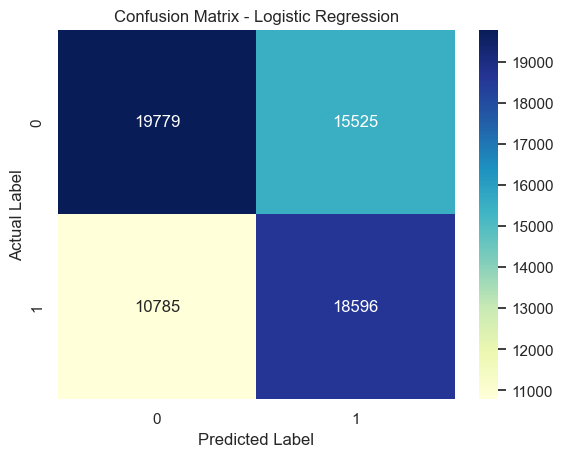

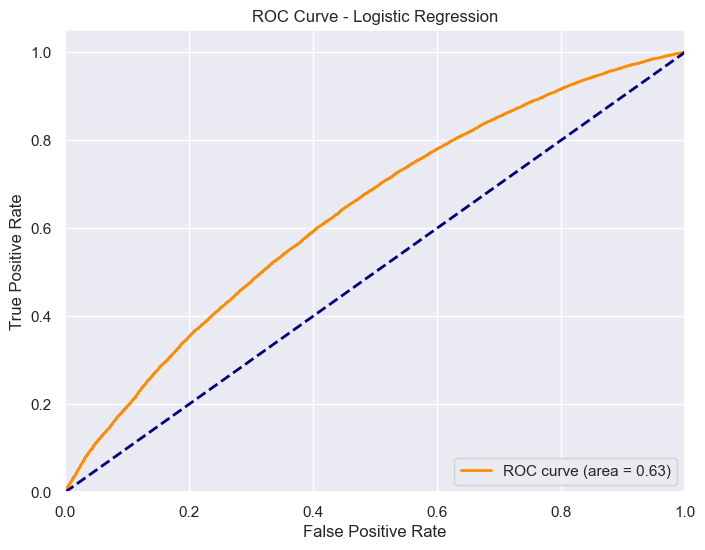

AUC-ROC for Logistic Regression: 0.63


In [108]:
# Logistic Regression
# Initialize and train the model
log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_model.fit(X_train_scaled, y_train)

# Predictions and predicted probabilities for ROC curve
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_scores_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1]  

# Model Evaluation
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_report_log_reg = classification_report(y_test, y_pred_log_reg)

# FPR, TPR, and AUC for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_scores_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_scores_log_reg)

# Results
print(f"Accuracy (Logistic Regression): {accuracy_log_reg:.2f}")
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_log_reg)
print("Classification Report (Logistic Regression):")
print(class_report_log_reg)

# Confusion Matrix for Logistic Regression
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_matrix_log_reg), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.set_title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# AUC score for Logistic Regression
print(f"AUC-ROC for Logistic Regression: {roc_auc_log_reg:.2f}")

Accuracy (Decision Tree): 0.77
Confusion Matrix (Decision Tree):
[[24923 10381]
 [ 4265 25116]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.85      0.71      0.77     35304
           1       0.71      0.85      0.77     29381

    accuracy                           0.77     64685
   macro avg       0.78      0.78      0.77     64685
weighted avg       0.79      0.77      0.77     64685



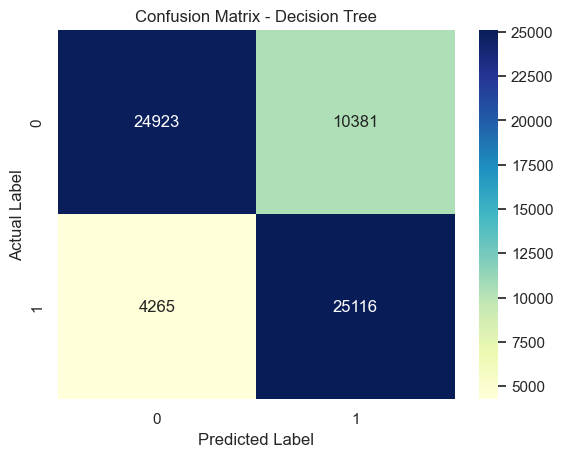

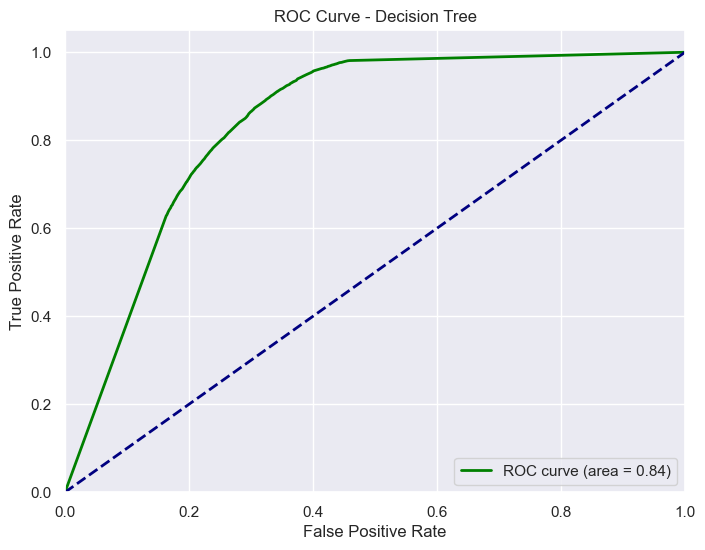

AUC-ROC for Decision Tree: 0.84


In [126]:
# Decision-Tree
# Initialize and train the model
dt_model = DecisionTreeClassifier(max_depth = 30, random_state=99)
dt_model.fit(X_train_scaled, y_train)

# Predictions and predicted probabilities for ROC curve
y_pred_dt = dt_model.predict(X_test_scaled)
y_scores_dt = dt_model.predict_proba(X_test_scaled)[:, 1]  

# Model Evaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Calculate FPR, TPR, and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_scores_dt)
roc_auc_dt = roc_auc_score(y_test, y_scores_dt)

# Results
print(f"Accuracy (Decision Tree): {accuracy_dt:.2f}")
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)
print("Classification Report (Decision Tree):")
print(class_report_dt)

# Confusion Matrix for Decision Tree
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_matrix_dt), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.set_title('Confusion Matrix - Decision Tree')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC curve for Decision Tree
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()

# AUC score for Decision Tree
print(f"AUC-ROC for Decision Tree: {roc_auc_dt:.2f}")

Accuracy (KNN): 0.60
Confusion Matrix (KNN):
[[20636 14668]
 [11066 18315]]
Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.65      0.58      0.62     35304
           1       0.56      0.62      0.59     29381

    accuracy                           0.60     64685
   macro avg       0.60      0.60      0.60     64685
weighted avg       0.61      0.60      0.60     64685



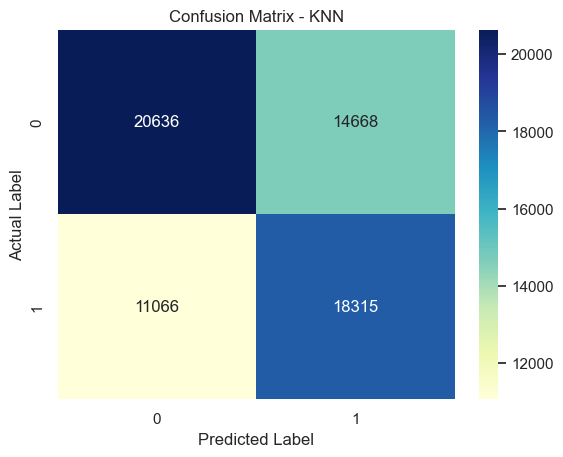

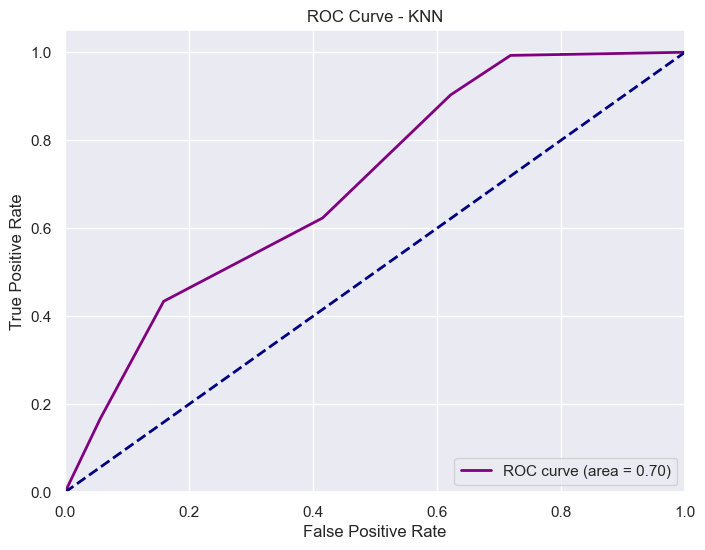

AUC-ROC for KNN: 0.70


In [112]:
# k- Nearest Neighbours
# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions and predicted probabilities for ROC curve
y_pred_knn = knn_model.predict(X_test_scaled)
y_scores_knn = knn_model.predict_proba(X_test_scaled)[:, 1]  

# Model Evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

# FPR, TPR, and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_scores_knn)
roc_auc_knn = roc_auc_score(y_test, y_scores_knn)

# Results
print(f"Accuracy (KNN): {accuracy_knn:.2f}")
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)
print("Classification Report (KNN):")
print(class_report_knn)

# Confusion Matrix for KNN
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_matrix_knn), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.set_title('Confusion Matrix - KNN')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC curve for KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='purple', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc="lower right")
plt.show()

# AUC score for KNN
print(f"AUC-ROC for KNN: {roc_auc_knn:.2f}")

Accuracy (Random Forest): 0.85
Confusion Matrix (Random Forest):
[[27281  8023]
 [ 1966 27415]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.93      0.77      0.85     35304
           1       0.77      0.93      0.85     29381

    accuracy                           0.85     64685
   macro avg       0.85      0.85      0.85     64685
weighted avg       0.86      0.85      0.85     64685



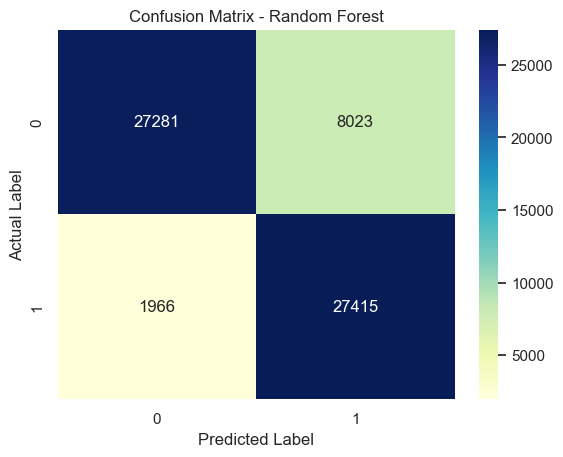

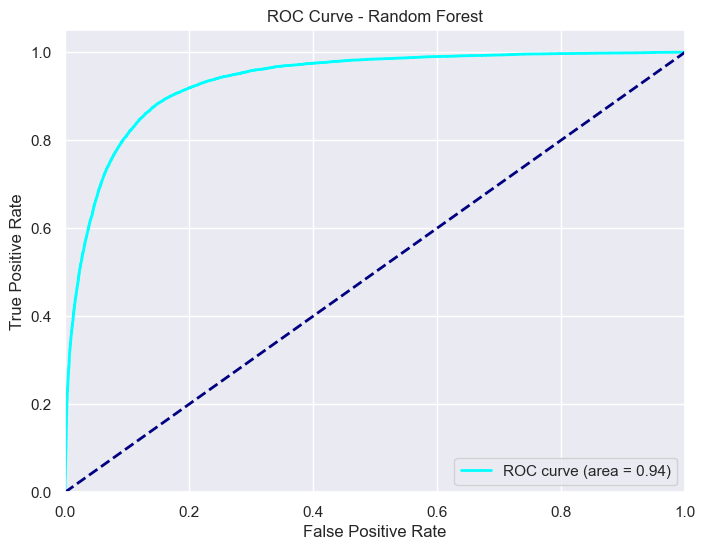

AUC-ROC for Random Forest: 0.94


In [124]:
# Random Forest
# Initialize and train the model
random_forest_model = RandomForestClassifier(max_depth = 30, random_state=99, class_weight='balanced')
random_forest_model.fit(X_train_scaled, y_train)

# Predictions and predicted probabilities for ROC curve
y_pred_random_forest = random_forest_model.predict(X_test_scaled)
y_scores_random_forest = random_forest_model.predict_proba(X_test_scaled)[:, 1]  

# Model Evaluation
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
conf_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)
class_report_random_forest = classification_report(y_test, y_pred_random_forest)

# FPR, TPR, and AUC for Random Forest
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_scores_random_forest)
roc_auc_random_forest = roc_auc_score(y_test, y_scores_random_forest)

# Results
print(f"Accuracy (Random Forest): {accuracy_random_forest:.2f}")
print("Confusion Matrix (Random Forest):")
print(conf_matrix_random_forest)
print("Classification Report (Random Forest):")
print(class_report_random_forest)

# Confusion Matrix for Random Forest
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_matrix_random_forest), annot=True, cmap="YlGnBu", fmt='g', ax=ax)
ax.set_title('Confusion Matrix - Random Forest')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_random_forest, tpr_random_forest, color='cyan', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_random_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

# AUC score for Random Forest
print(f"AUC-ROC for Random Forest: {roc_auc_random_forest:.2f}")

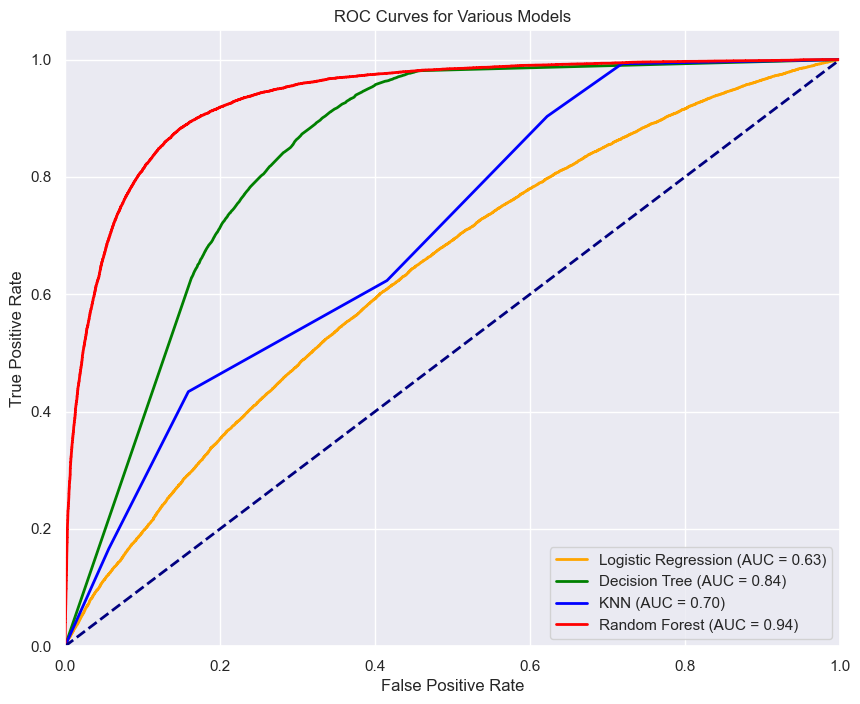

AUC-ROC for Logistic Regression: 0.63
AUC-ROC for Decision Tree: 0.84
AUC-ROC for KNN: 0.70
AUC-ROC for Random Forest: 0.94


In [128]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='orange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log_reg)
plt.plot(fpr_dt, tpr_dt, color='green', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_random_forest, tpr_random_forest, color='red', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_random_forest)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Models')
plt.legend(loc="lower right")
plt.show()

# AUC scores for all models
print(f"AUC-ROC for Logistic Regression: {roc_auc_log_reg:.2f}")
print(f"AUC-ROC for Decision Tree: {roc_auc_dt:.2f}")
print(f"AUC-ROC for KNN: {roc_auc_knn:.2f}")
print(f"AUC-ROC for Random Forest: {roc_auc_random_forest:.2f}")


In [130]:
# Predicting the risk of defaulting based on the algorithm with the highest AUC
# Function to classify risk based on probability thresholds
def classify_risk(prob):
    if prob <= 0.2:
        return 'Low Risk'
    elif 0.2 < prob <= 0.6:
        return 'Medium Risk'
    elif 0.6 < prob <= 0.8:
        return 'High Risk'
    else:
        return 'No Disbursal'

risk_classification_rf = pd.Series(y_scores_random_forest).apply(classify_risk)

# Create a DataFrame to store the risk classification, predicted probabilities, predictions, and actual values
risk_classification_results_rf = pd.DataFrame({
    'Actual Values': y_test.values, 
    'Random Forest Predictions': y_pred_random_forest,
    'Random Forest Risk Classification': risk_classification_rf,
    'Random Forest Probability': y_scores_random_forest
})

# Save the results to a CSV file
risk_classification_results_rf.to_csv('risk_classification_results.csv', index=False)

print("Random Forest risk classification results saved to 'risk_classification_results.csv'")

Random Forest risk classification results saved to 'risk_classification_results.csv'
